In [1]:
# This notebook is for DUP evaluation
# I have developed skeleton code for the evaluation of DUP using LAST and HG2-T2T v0.9 data
# This notebook is for transition from HG2-T2T v0.9 to HG2-T2T v1.0 and LAST to minimap2
# Additionally, I want to incorporate evaluating DUP+DEL cases in T2T-ACE
# TODO: 1. Transit initial analyzing code for DUP evaluation to avoid repetitive code for the same function and add more functions specific to DUP evaluation
# TODO: 2. Develop code for DUP+DEL evaluation


In [2]:
import warnings
warnings.filterwarnings( "ignore", module = "seaborn\..*" )
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )
import T2T_ACE.alignment_utilities as au 
import T2T_ACE.validator as v
import T2T_ACE.alignment_visualization_utilities as avu
import importlib

INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [3]:
# Update the reference genomes to local path
class ReferenceLocations:
        hg002t2t = "/Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta"
        chm13 = "/Users/gaoyueya/Documents/Reference_Genome/chm13v2.0.fa.gz"
        hg38 = "/Users/gaoyueya/Documents/Reference_Genome/Homo_sapiens_assembly38.fasta"

In [4]:
# Load HG002 T2T reference
hg002t2t = au.load_reference(ReferenceLocations.hg002t2t)
# Load hg38 reference
hg38 = au.load_reference(ReferenceLocations.hg38)

INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta
INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/Homo_sapiens_assembly38.fasta


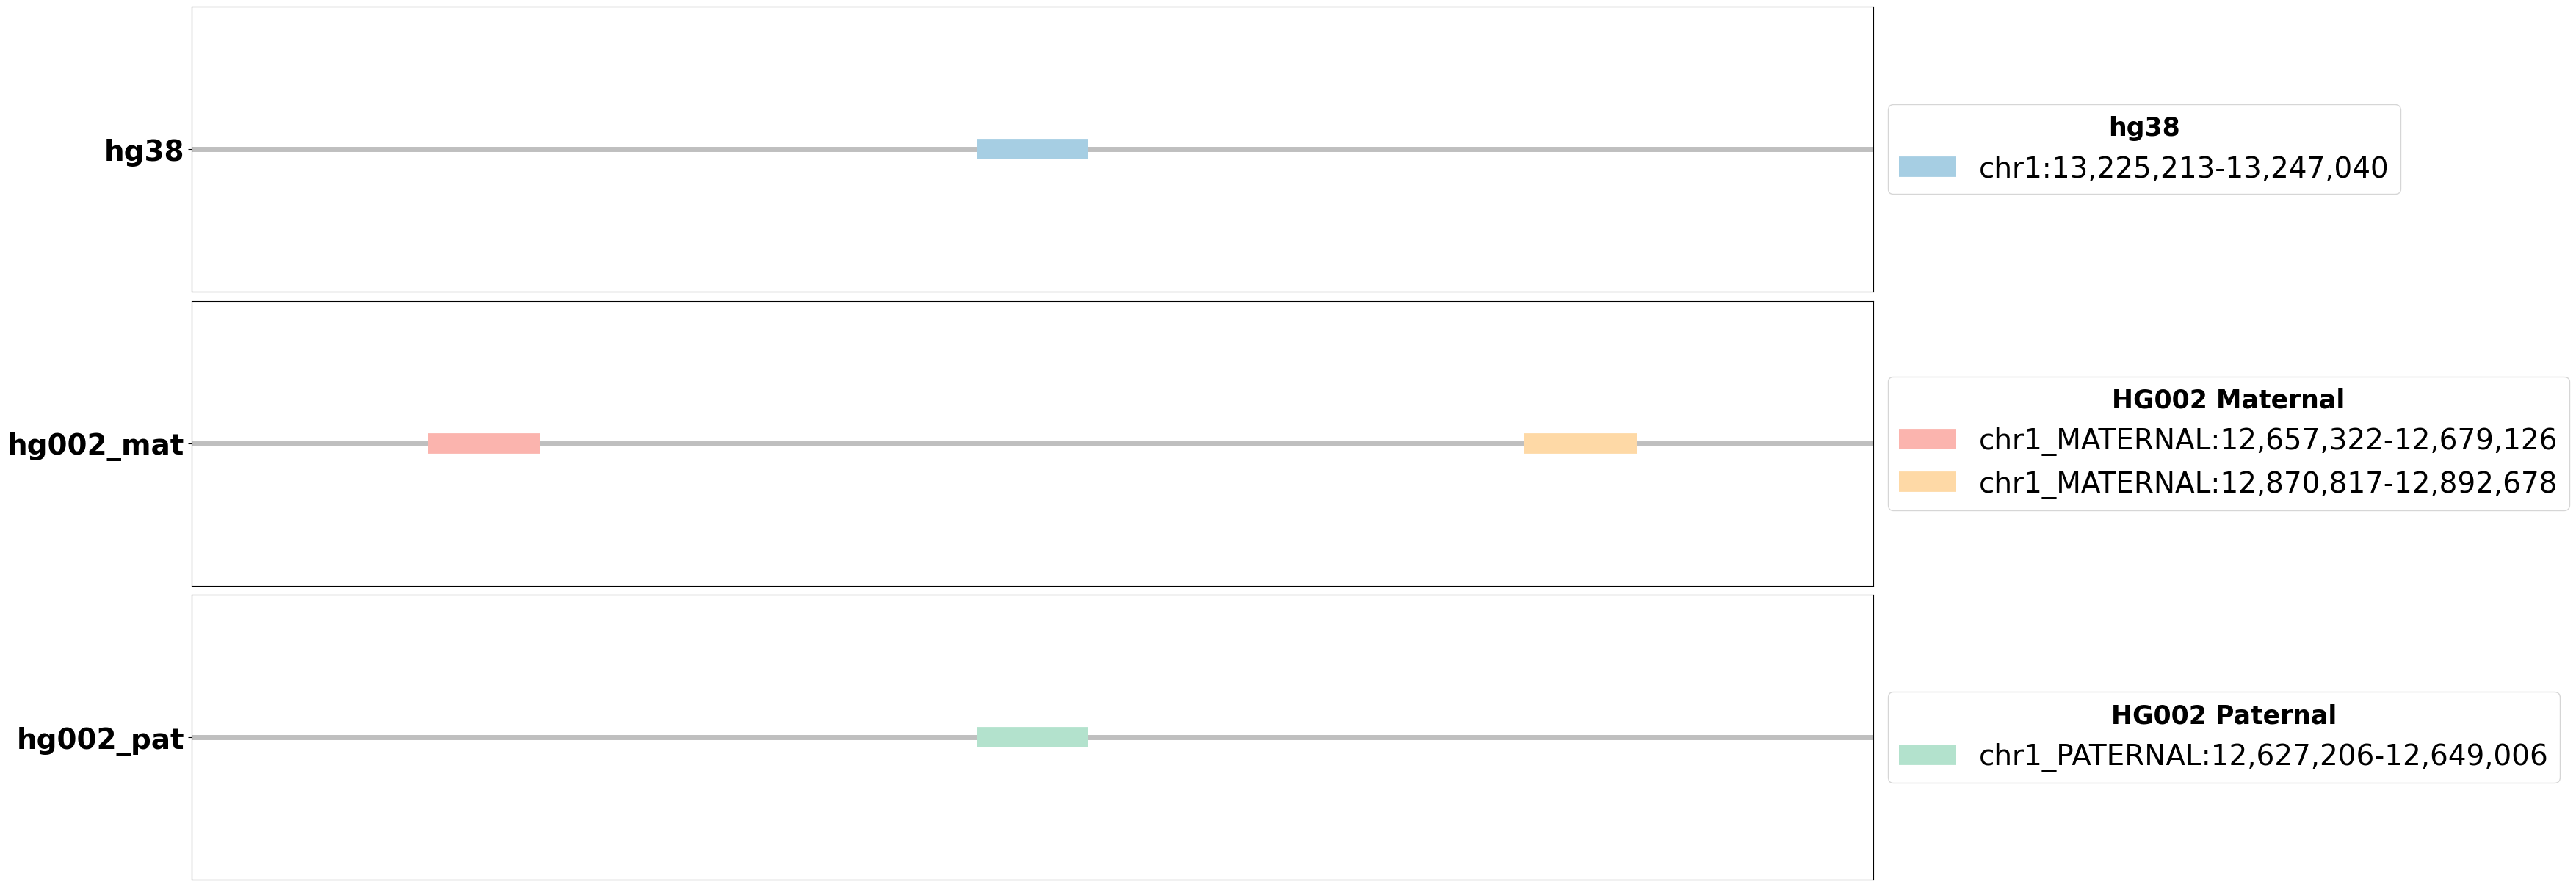

In [8]:
# Test chrom interval plotting function
avu.PlotIntervals(["chr1:13225213-13247040"],['chr1_MATERNAL:12657322-12679126', 'chr1_PATERNAL:12627206-12649006', 'chr1_MATERNAL:12870817-12892678']).plot_intervals_comparison(flanking=False, ratio=15)

In [10]:
import T2T_ACE.genomic_queries as gq

In [17]:
# Check if I could reproduce the alignment results with minimap2
# Grab sequence from hg38 interval
test_dup_svlen = len(gq.get_sequence_from_interval(ReferenceLocations.hg38, "chr1:13225213-13247040"))
print(f"chr1:13225213-13247040\tSVLEN={test_dup_svlen}")

chr1:13225213-13247040	SVLEN=21828


In [25]:
test_dup_seq = gq.get_sequence_from_interval(ReferenceLocations.hg38, "chr1:13225213-13247040")
test_dup_hg2_hits = [_ for _ in hg002t2t.map(test_dup_seq)]
test_dup_hg38_hits = [_ for _ in hg38.map(test_dup_seq)]

In [26]:
au.print_hits("Raw Sequence hg38", test_dup_svlen, test_dup_hg38_hits)
au.print_hits("Raw Sequence hg002", test_dup_svlen, test_dup_hg2_hits)

+Raw Sequence hg38 21828: chr1_KI270766v1_alt 168680-190508	(0-21828)	21828 21828M
+Raw Sequence hg38 21828: chr1 13225212-13247040	(0-21828)	21828 21828M
+Raw Sequence hg002 21828: chr1_PATERNAL 12618932-12640734	(0-21828)	21754 21786M42I16D
+Raw Sequence hg002 21828: chr1_MATERNAL 12654730-12676536	(0-21828)	21758 21790M38I16D
+Raw Sequence hg002 21828: chr1_MATERNAL 12868221-12890084	(0-21828)	21613 21765M63I98D


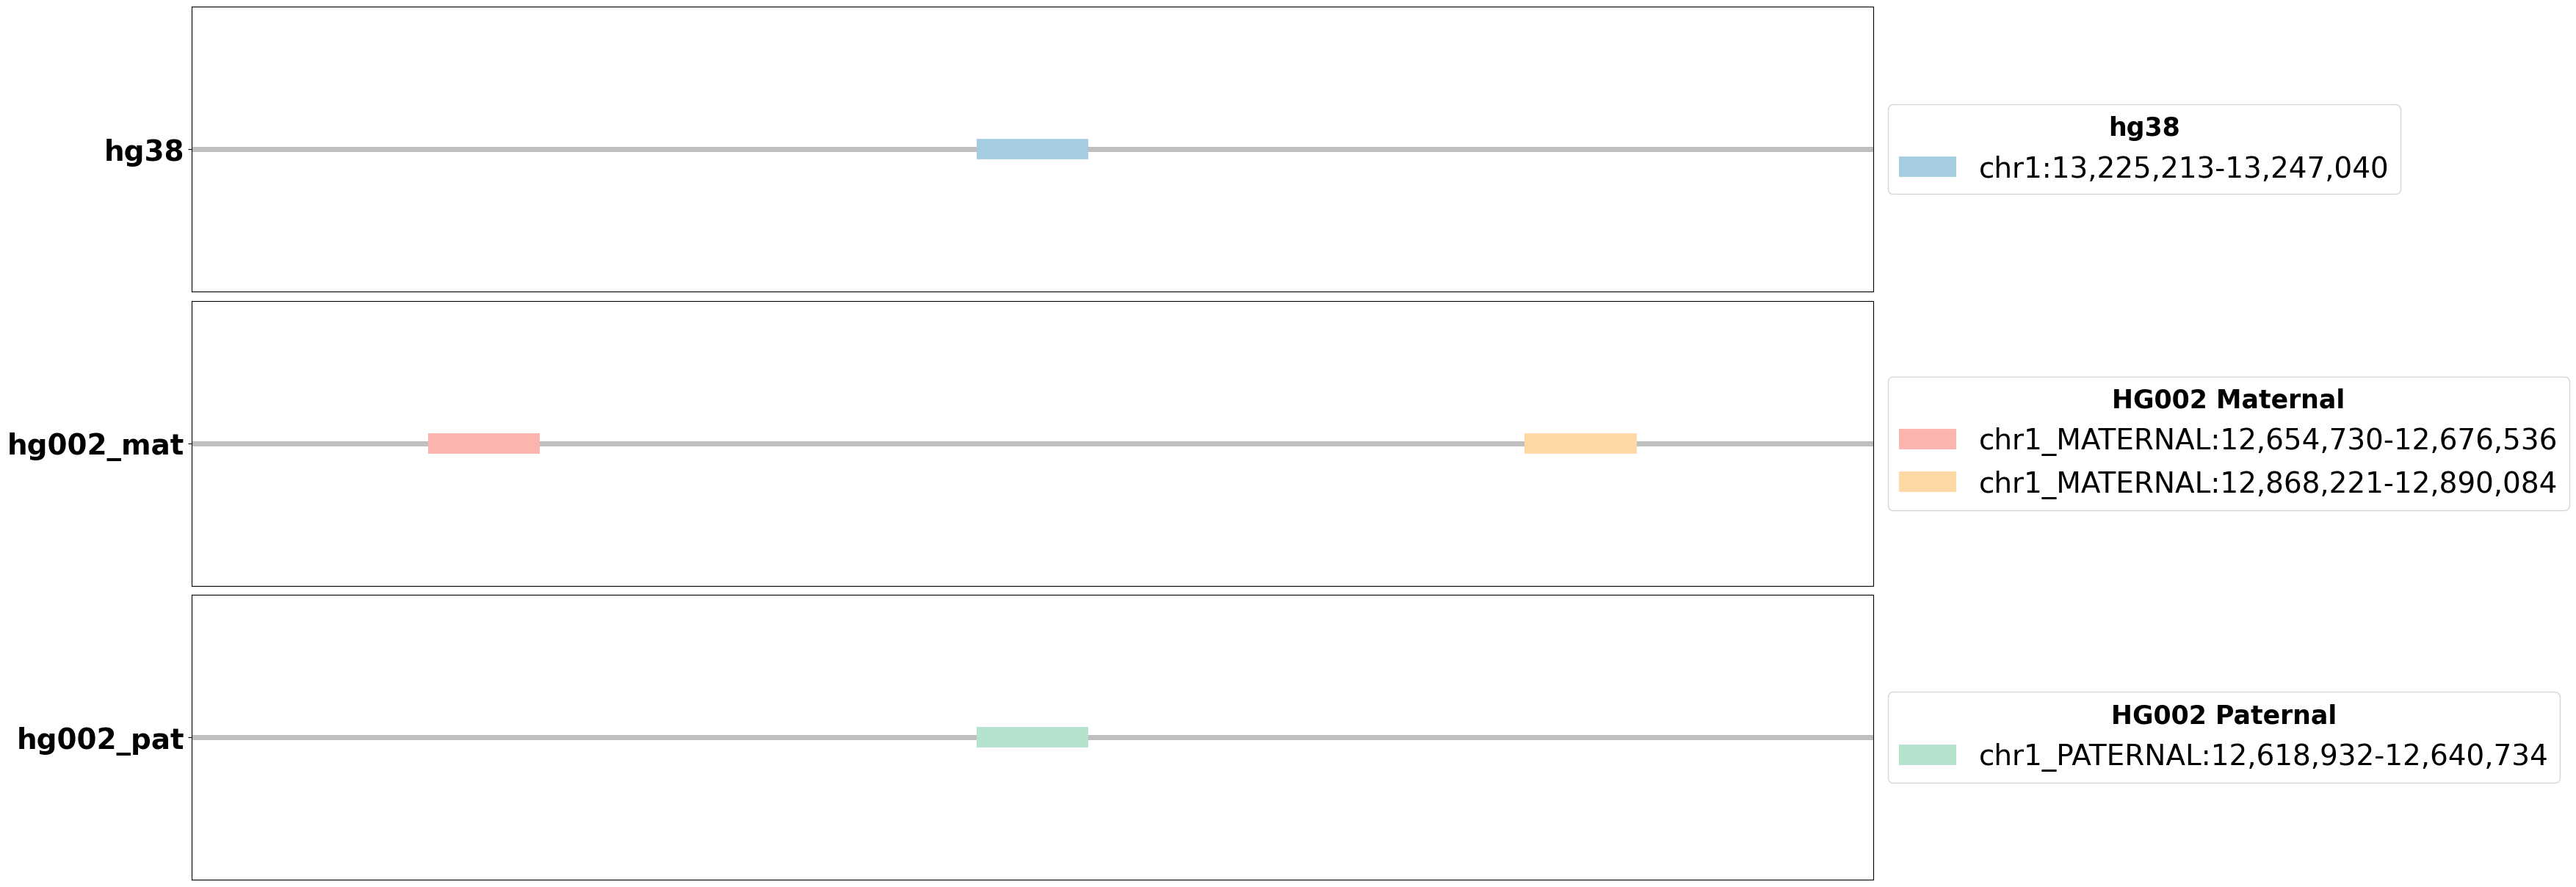

In [23]:
avu.PlotIntervals(["chr1:13225213-13247040"],['chr1_MATERNAL:12654730-12676536', 'chr1_PATERNAL:12618932-12640734', 'chr1_MATERNAL:12868221-12890084']).plot_intervals_comparison(flanking=False, ratio=15)

In [27]:
# Grab the DEL event seq within the DUP event
test_del_seq = gq.get_sequence_from_interval(ReferenceLocations.hg38, "chr1:13235347-13240700")
test_del_hg2_hits = [_ for _ in hg002t2t.map(test_del_seq)]
test_del_hg38_hits = [_ for _ in hg38.map(test_del_seq)]

In [28]:
au.print_hits("DEL Sequence hg38", len(test_del_seq), test_del_hg38_hits)
au.print_hits("DEL Sequence hg002", len(test_del_seq), test_del_hg2_hits)

+DEL Sequence hg38 5354: chr1 13235346-13240700	(0-5354)	5354 5354M
+DEL Sequence hg38 5354: chr1_KI270766v1_alt 178814-184168	(0-5354)	5354 5354M
+DEL Sequence hg002 5354: chr1_MATERNAL 12661062-12666390	(0-5354)	5320 5327M27I1D
+DEL Sequence hg002 5354: chr1_PATERNAL 12625265-12630588	(0-5354)	5314 5322M32I1D
+DEL Sequence hg002 5354: chr1_MATERNAL 12878375-12883746	(0-5354)	5304 5319M35I52D


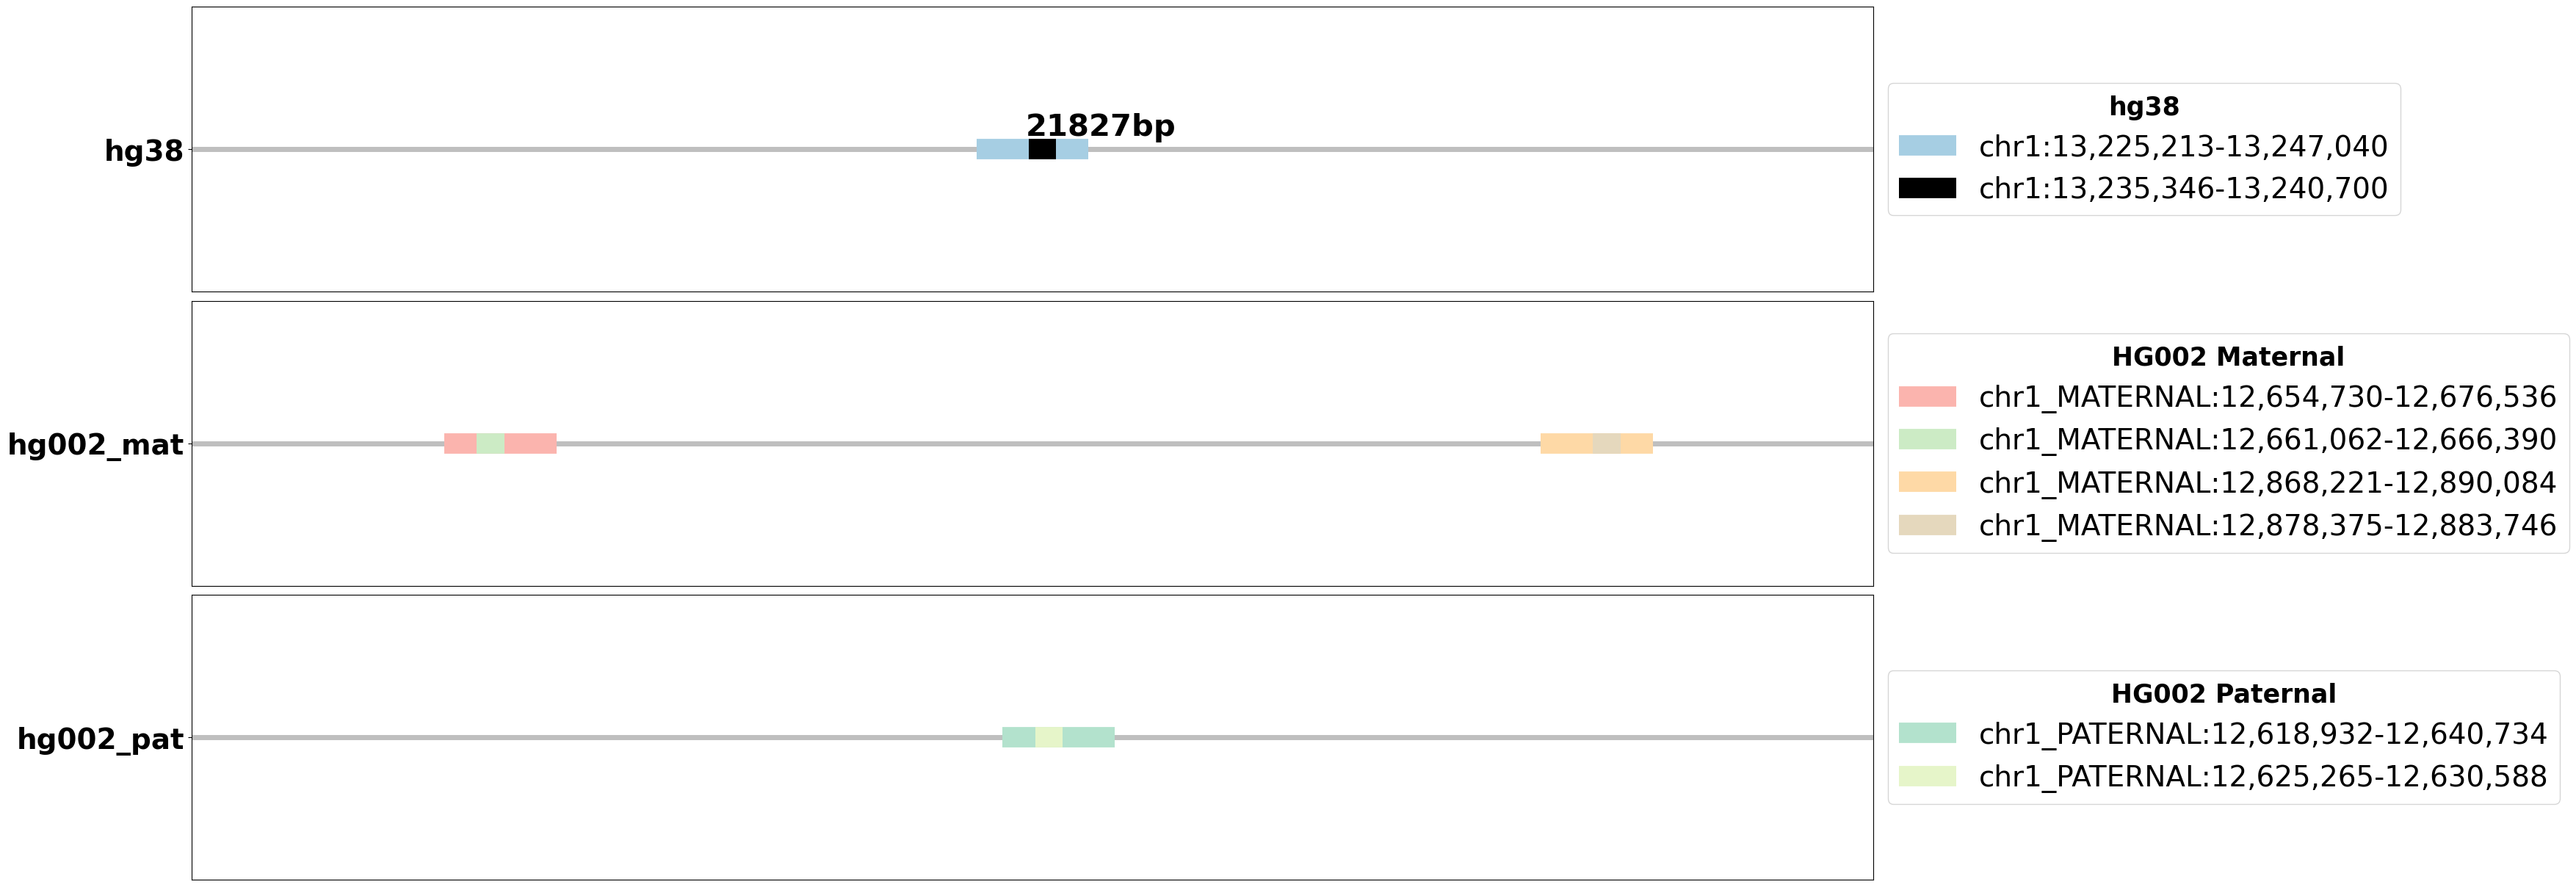

In [31]:
avu.PlotIntervals(["chr1:13225213-13247040","chr1:13235346-13240700"],['chr1_MATERNAL:12654730-12676536','chr1_MATERNAL:12661062-12666390', 'chr1_PATERNAL:12618932-12640734','chr1_PATERNAL:12625265-12630588','chr1_MATERNAL:12868221-12890084','chr1_MATERNAL:12878375-12883746']).plot_intervals_comparison(flanking=False, ratio=15)

In [32]:
# Construct the DUP sequence without the DEL sequence
# We expect to see some alignment results in HG2-T2T
dup_left_del_seq = gq.get_sequence_from_interval(ReferenceLocations.hg38, "chr1:13225213-13235346")
dup_right_del_seq = gq.get_sequence_from_interval(ReferenceLocations.hg38, "chr1:13240700-13247040")

dup_no_del_seq = dup_left_del_seq + dup_right_del_seq 

In [34]:
# Check the length of the DUP sequence without the DEL sequence
len(test_dup_seq) - len(test_del_seq)

16474

In [33]:
# Check the newly constructed DUP_NO_DEL sequence length
len(dup_no_del_seq)

16475

In [36]:
dup_no_del_hg2_hits = [_ for _ in hg002t2t.map(dup_no_del_seq)]
dup_no_del_hg38_hits = [_ for _ in hg38.map(dup_no_del_seq)]

au.print_hits("CONSTRUCTED Sequence hg38", len(dup_no_del_seq), dup_no_del_hg38_hits)
au.print_hits("CONSTRUCTED Sequence hg002", len(dup_no_del_seq), dup_no_del_hg2_hits)

+CONSTRUCTED Sequence hg38 16475: chr1 13225212-13247040	(0-16475)	16475 16475M5353D
+CONSTRUCTED Sequence hg38 16475: chr1_KI270766v1_alt 168680-190508	(0-16475)	16475 16475M5353D
+CONSTRUCTED Sequence hg38 16475: chr1_KI270766v1_alt 2979-19420	(0-16475)	16192 16397M78I44D
+CONSTRUCTED Sequence hg002 16475: chr1_PATERNAL 12618932-12640734	(0-16475)	16441 16465M10I5337D
+CONSTRUCTED Sequence hg002 16475: chr1_MATERNAL 12654730-12676536	(0-16475)	16439 16464M11I5342D
+CONSTRUCTED Sequence hg002 16475: chr1_MATERNAL 12868221-12890084	(0-16475)	16310 16447M28I5416D
+CONSTRUCTED Sequence hg002 16475: chr1_PATERNAL 12789955-12806396	(0-16475)	16192 16397M78I44D
